In [18]:
import pandas as pd
import numpy as np
import math
import statistics
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
df_nyc = pd.read_csv('./dataset/nyc-rolling-sales.csv')
df_nyc.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [20]:
df_nyc.drop(columns=('Unnamed: 0'),inplace=True)

In [21]:
df_nyc.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [22]:
df_nyc['BOROUGH'] = df_nyc['BOROUGH'].astype(str)
df_nyc['BOROUGH'].replace({'1': 'Manhattan', '2': 'Bronx', '3': 'Brooklyn', '4': 'Queens', '5': 'Staten Island'},inplace=True)
df_nyc['SALE PRICE'] = df_nyc['SALE PRICE'].replace({' -  ':'0'})
df_nyc['SALE PRICE'] = df_nyc['SALE PRICE'].astype(float)
df_nyc['SALE DATE'] = pd.to_datetime(df_nyc['SALE DATE'])
df_nyc['sale_month'] = df_nyc['SALE DATE'].dt.month_name()
df_nyc['sale_year'] = df_nyc['SALE DATE'].dt.year

In [23]:
df_nyc.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_month,sale_year
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,1633,6440,1900,2,C2,6625000.0,2017-07-19,July,2017
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,31,4616,18690,1900,2,C7,0.0,2016-12-14,December,2016
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,17,2212,7803,1900,2,C7,0.0,2016-12-09,December,2016
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,2272,6794,1913,2,C4,3936272.0,2016-09-23,September,2016
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,2369,4615,1900,2,C2,8000000.0,2016-11-17,November,2016


In [24]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  object        
 1   NEIGHBORHOOD                    84548 non-null  object        
 2   BUILDING CLASS CATEGORY         84548 non-null  object        
 3   TAX CLASS AT PRESENT            84548 non-null  object        
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  object        
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  int64         
 11  RE

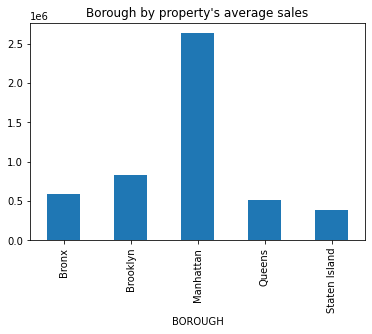

In [25]:
df_nyc['SALE PRICE'].groupby(df_nyc['BOROUGH']).mean().plot.bar()
plt.title("Borough by property's average sales")
plt.show()

In [26]:
median_sale = np.median(df_nyc['SALE PRICE'])
median_sale

415000.0

In [27]:
range_sale = np.ptp(df_nyc['SALE PRICE'])
range_sale

2210000000.0

In [28]:
years = df_nyc['YEAR BUILT'].unique()
n = len(years)
n

158

In [29]:
# year = list(map(str, range(1900,2017)))
# unit = df_nyc.groupby(df_nyc['YEAR BUILT']).sum()
# df_unit = unit['TOTAL UNITS'].to_numpy()

# for i in range(n):
#     for j in range(0, n-i-1):
#         if years[j] > years[j+1] :
#                 years[j], years[j+1] = years[j+1], years[j]
#                 df_unit[j], df_unit[j+1] = df_unit[j+1], df_unit[j]
        
# # print(years)
# # print(df_unit)

# data = pd.DataFrame(df_unit, years)
# data.iloc

In [30]:
df_nyc['TOTAL UNITS'].groupby(df_nyc['BUILDING CLASS CATEGORY']).sum()

BUILDING CLASS CATEGORY
01 ONE FAMILY DWELLINGS                         18648
02 TWO FAMILY DWELLINGS                         32451
03 THREE FAMILY DWELLINGS                       13137
04 TAX CLASS 1 CONDOS                            1630
05 TAX CLASS 1 VACANT LAND                        245
06 TAX CLASS 1 - OTHER                             30
07 RENTALS - WALKUP APARTMENTS                  39989
08 RENTALS - ELEVATOR APARTMENTS                31179
09 COOPS - WALKUP APARTMENTS                     1202
10 COOPS - ELEVATOR APARTMENTS                  12677
11 SPECIAL CONDO BILLING LOTS                       0
11A CONDO-RENTALS                                2605
12 CONDOS - WALKUP APARTMENTS                     926
13 CONDOS - ELEVATOR APARTMENTS                 12483
14 RENTALS - 4-10 UNIT                           3587
15 CONDOS - 2-10 UNIT RESIDENTIAL                1223
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT         94
17 CONDO COOPS                                    187
18 T